In [1]:
%matplotlib inline

# 复杂网络课程
## *用Python做复杂网络分析*

### NetworkX
NetworkX是python下的复杂网络分析包，内置了常用的复杂网络分析算法，不定期更新。

相关参考资料：
1. [NetworkX Documentation](https://networkx.github.io)
2. NetworkX入门笔记
    - [呆思的复杂网络博客](https://challenge19.github.io/2017/01/29/Complex-Networks/)
    - [关于不同程序包效率比较的博客](https://challenge19.github.io/2016/08/15/Network-Analysis-Package-in-Python/)
    - [科学网闫小勇博客](http://blog.sciencenet.cn/home.php?mod=space&uid=404069&do=blog&classid=141080&view=me&from=space)

In [2]:
## load packages
import networkx as nx
import numpy as np #数值计算包
import scipy as sp #科学计算包
import matplotlib.pyplot as plt #绘图包

## 简单的统计分析--以空手道俱乐部网络为例

空手道俱乐部网络是复杂网络分析中常用的一个例子网络，在分析节点中心性和社团结构等问题时都会被使用。
因此Networkx中也自带了空手道俱乐部网，以如下方式调用：
```python
G = nx.karate_club_graph()
```

也可以从外部文件读入数据

```python
G = nx.read_edgelist('./data/karate.csv',comments='S',delimiter=',',create_using=nx.Graph(),data=(('type', str),))#数据的位置，产生为什么网络（这里是无向网络），数据是如何分列的
```

In [3]:
##读取 空手道俱乐部 网络
G = nx.karate_club_graph()

接下来对该网络进行一些简单的统计分析。


#### 节点和边

网络节点的数量：
```python
N = G.number_of_nodes()  # len(G.nodes())
```

网络边的数量：
```python
N = G.number_of_edges()  # len(G.edges())
```

In [5]:
## 节点和边的数量

N = G.number_of_nodes()
L = G.number_of_edges()

print 'total nodes:',N
print 'total edges:',L

total nodes: 34
total edges: 78


#### 节点的度

节点的度定义为节点的边的数量(在有向网中，可以是入边或者出边)。

```python
G.degree()  #返回所有节点的度
G.degree(1) #返回特定节点的度
```

degree of each node: {0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}
average degree: 4.58823529412


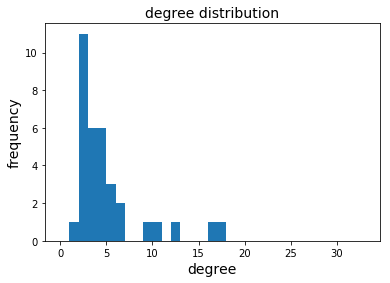

In [6]:
## 节点的度

degs = nx.degree(G)
print 'degree of each node:',degs
print 'average degree:',np.mean(degs.values())
## 度分布 统计分布图

plt.hist(degs.values(), bins=range(N))
plt.xlabel('degree',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.title('degree distribution',fontsize=14)

#### 集聚系数

$$c_i=\frac{\sum_j\sum_m A_{ij}A_{jm}A_{mi}}{k_i(k_i-1)}$$

$$C = \langle c_i \rangle$$

```python
nx.clustering(G)   #返回所有节点的集聚系数
nx.clustering(G,1) #返回特定节点的集聚系数
```

In [7]:
## 聚集系数
cc = nx.clustering(G)
print 'clustering coefficient of each node:',cc
print 'average clustering coefficient:',np.mean(cc.values()) # nx.average_clustering(G)

clustering coefficient of each node: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0.0, 10: 0.6666666666666666, 11: 0.0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}
average clustering coefficient: 0.570638478208


我们可以注意到，NetworkX计算得到平均集聚系数与Gephi得到的结果(0.58)有所不同，主要原因是两者在处理度为1的节点时采取了不同的做法：
- Gephi：忽略度为1的节点
- networkx：直接取值为0

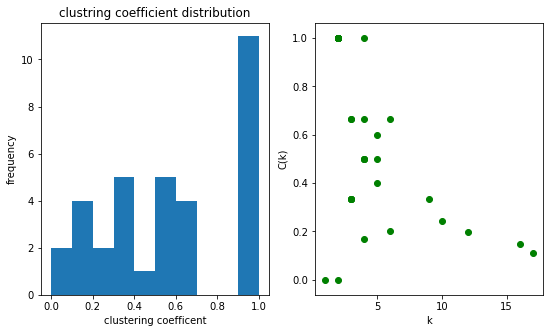

In [8]:
## 聚集系数 统计分布图

plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.hist(cc.values(), bins=10)
plt.xlabel('clustering coefficent')
plt.ylabel('frequency')
plt.title('clustring coefficient distribution')


plt.subplot(1,2,2)
plt.scatter([degs[i] for i in G],[cc[i] for i in G],c='g')
plt.xlabel('k')
plt.ylabel('C(k)')

从散点图上可以看到集聚系数与度负相关，这样的结果是社会网络的特点吗？可以看看相同度序列下的随机网络的结果

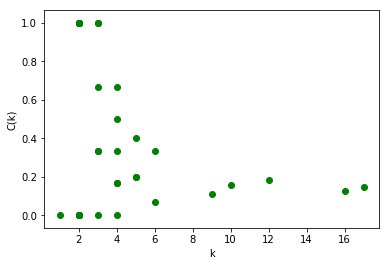

In [16]:
g_r = nx.algorithms.swap.double_edge_swap(G,4*G.number_of_edges(),max_tries=10000)
cc_r = nx.clustering(g_r)
plt.scatter([degs[i] for i in G],[cc_r[i] for i in G],c='g')
plt.xlabel('k')
plt.ylabel('C(k)')

#### 最短距离

节点间的最短距离$d_{ij}$表示从节点i最少走多少距离可以到节点j。

```python
nx.shortest_path_length(G,source=1,target=2) #返回特定节点间的最短距离
nx.shortest_path_length(G,source=1) #返回特定节点与其它所有节点的最短距离
nx.shortest_path_length(G) #返回所有节点间的最短距离
```

In [17]:
## 两个节点间的最短距离
d12 = nx.shortest_path_length(G, source=2, target=19) # 节点 2 和节点 19间的最短距离
print 'SPL between 2 and 19:',d12


## 节点间最短距离
avg_d = nx.average_shortest_path_length(G) # 平均最短距离
print 'average SPL:',avg_d

SPL between 2 and 19: 2
average SPL: 2.21212121212


2.40819964349


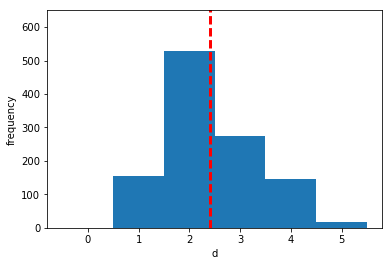

In [15]:
## 最短距离分布
pair_d = nx.shortest_path_length(G) # 任意两个节点间的距离

dd = [pair_d[i][j] for i in G for j in G if i!=j]
print np.mean(dd)

bins = np.arange(-0.5, max(dd)+1.5, 1.0)
plt.hist(dd,bins=bins)

plt.plot([avg_d,avg_d],[0,1000],'r--',lw=3)

plt.ylim(0,650)

plt.xlabel('d')
plt.ylabel('frequency')

NetworkX 在计算最短距离时，如果遇到网络不联通，会提示错误。有两种处理方式：
1. 分别计算分别每个子联通网络的平均最短距离
2. 将不联通的两个节点的距离记为网络规模N

In [16]:
def spl_1(g):
    spl = []
    for sg in nx.connected_component_subgraphs(g):
        spl.append(nx.average_shortest_path_length(sg))
    return np.mean(spl)


def spl_2(g):
    spl = 0
    N = len(g)
    for sg in nx.connected_component_subgraphs(g):
        n = len(sg)
        if len(sg)>1:
            spl+=nx.average_shortest_path_length(sg) * n*(n-1)
        spl += N*n*(N-n)
    return spl/N/(N-1)

In [7]:
print nx.betweenness_centrality(G)


nx.betweenness_centrality()

{0: 0.4376352813852815, 1: 0.053936688311688304, 2: 0.14365680615680618, 3: 0.011909271284271283, 4: 0.0006313131313131313, 5: 0.02998737373737374, 6: 0.029987373737373736, 7: 0.0, 8: 0.05592682780182781, 9: 0.0008477633477633478, 10: 0.0006313131313131313, 11: 0.0, 12: 0.0, 13: 0.04586339586339586, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.03247504810004811, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.017613636363636363, 24: 0.0022095959595959595, 25: 0.0038404882154882154, 26: 0.0, 27: 0.02233345358345358, 28: 0.0017947330447330447, 29: 0.0029220779220779218, 30: 0.014411976911976907, 31: 0.13827561327561325, 32: 0.145247113997114, 33: 0.304074975949976}


## 随机网络模型
随机网络模型是网络分析中常用的模型网络。
Erd\"os R\'enyi随机网络的产生的规则为以p的概率在任意两个节点产生一条边。
随着网络平均度的增大，ER随机网络会逐渐呈现出丰富的相变现象。

average degree: 6.026
15


(array([ 0.003,  0.016,  0.052,  0.08 ,  0.128,  0.168,  0.143,  0.138,
         0.11 ,  0.08 ,  0.043,  0.021,  0.011,  0.002,  0.004,  0.001]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5]),
 <a list of 16 Patch objects>)

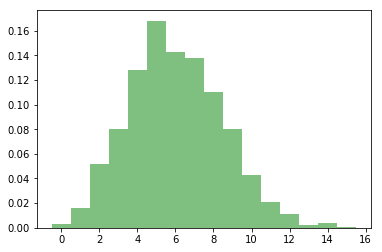

In [36]:
N = 1000
p = 6.0/N

## 产生ER随机网
g = nx.erdos_renyi_graph(N, p, directed=False)

# g = nx.generators.random_graphs.gnm_random_graph(num_of_nodes, num_of_edges)
# g = nx.generators.random_graphs.gnp_random_graph(num_of_nodes, connect_prob)


## 平均度
degree_of_g = nx.degree(g)
print 'average degree:',np.mean(degree_of_g.values())


## 度分布
degree_of_g = degree_of_g.values()
print max(degree_of_g)
bins = np.arange(-0.5, max(degree_of_g)+1.5, 1.0)
plt.hist(degree_of_g, bins = bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('degree')
plt.title('degree distribution')


### 随机网理论分析
1. 理论推导随机网络的度分布(二项分布 -> Poisson)
2. 用程序生成ER随机网，改变不同平均度下，随机网的各个统计指标

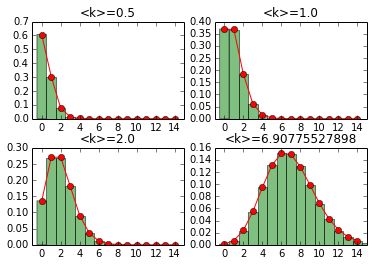

In [26]:
import scipy.stats

N = 1000

krange = [0.5, 1.0, 2.0, np.log(N)]

for i in xrange(4):
    k = krange[i]
    p = 1.0*k/(N-1)
    deg = []
    for _ in xrange(100):
        g = nx.erdos_renyi_graph(N, p, directed=False)
        deg += nx.degree(g).values()
    plt.subplot(2,2,i+1)
    bins = np.arange(-0.5, max(deg)+0.5, 1.0)
    plt.hist(deg, bins = bins, normed=1, facecolor='green', alpha=0.5)
    plt.plot(xrange(15), [scipy.stats.poisson.pmf(xi, k) for xi in xrange(15)], 'ro-')
    plt.xlim(-1, 15)
    plt.title('<k>=%s'%k)
plt.subplots_adjust(wspace=0.2, hspace=0.3)

#### 连通集团
子网络中任意两点间可以可达(有向网络，可以分为弱连通集团和强连通集团)。


```python
nx.connected_component_subgraphs(g) #返回无向网络的各个连通集团
nx.strongly_connected_componen_subgraphs(g) #返回有向网络的强连通集团
nx.waekly_connected_componen_subgraphs(g) #返回有向网络的弱连通集团
```

In [23]:
N = 1000

krange = np.arange(0.2,2*np.log(N), 0.2)

In [24]:
Avg_deg = []
Avg_cls = []
Avg_spl = []
Avg_gcc = []

for k in krange:
    avg_deg = []
    avg_cls = []
    avg_spl = []
    avg_gcc = []
    for _ in xrange(10):
        p = 1.0*k/(N-1)
        g = nx.erdos_renyi_graph(N, p, directed=False)

        avg_deg.append(np.mean(nx.degree(g).values()))
        avg_cls.append(nx.average_clustering(g))
        avg_gcc.append(max([len(x) for x in nx.connected_components(g)]))
        
        avg_spl.append(spl_2(g))
        #if nx.is_connected(g):
            #avg_spl.append(nx.average_shortest_path_length(g))
        #else:
            #avg_spl.append(N-1)
    Avg_deg.append(np.mean(avg_deg))
    Avg_cls.append(np.mean(avg_cls))
    Avg_spl.append(np.mean(avg_spl))
    Avg_gcc.append(1.0*np.mean(avg_gcc)/N)
#plt.plot(krange, Avg_deg, 'o-')
#plt.title('<k>')

最大连通集团随着平均度的变化

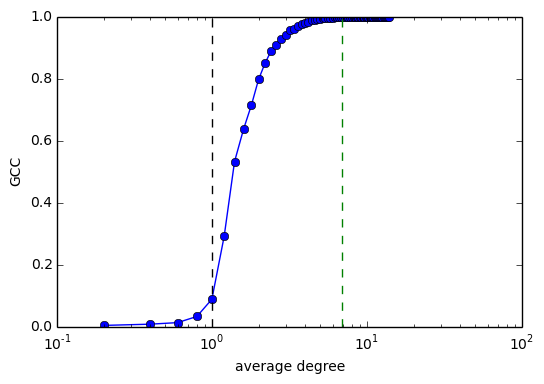

In [5]:
## 最大连通集团
plt.plot(krange, Avg_gcc,'o-')
plt.plot([1,1],[0,1],'k--')
plt.plot([np.log(N)]*2,[0,1],'g--')
plt.xscale('log')
plt.xlabel('average degree')
plt.ylabel('GCC')

集聚系数随着平均度的变化

$$C = \frac{\langle k \rangle}{N}$$

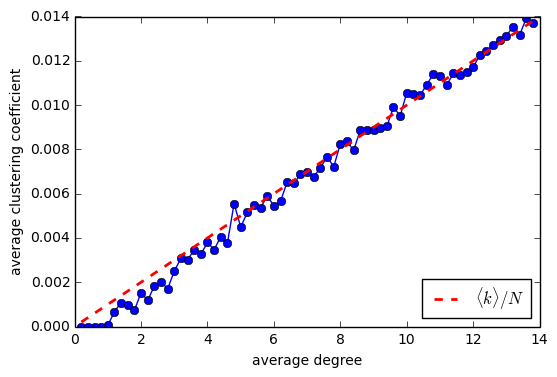

In [6]:
plt.plot(krange, Avg_cls, 'o-')
plt.plot(krange, [k/N for k in krange], 'r--',lw=2,label=r'$\langle k \rangle/N$')
plt.xlabel('average degree')
plt.ylabel('average clustering coefficient')
plt.legend(loc='lower right')

最短距离随着平均度的变化

在平均度比较大的情况下：
$$d = \frac{\ln N}{\ln K}$$

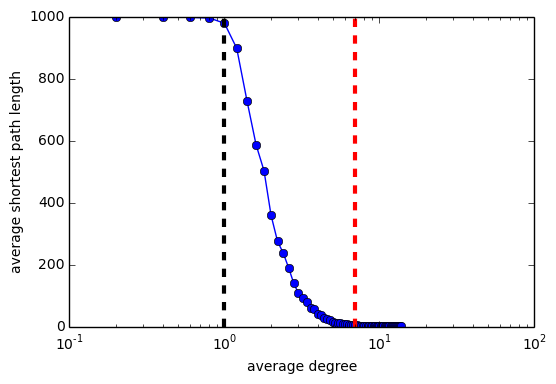

In [28]:
plt.plot(krange, Avg_spl, 'o-')
plt.xscale('log')
plt.xlabel('average degree')
plt.ylabel('average shortest path length')
plt.plot([np.log(N)]*2, [0,1000], 'r--', lw=3)
plt.plot([1]*2, [0,1000], 'k--', lw=3)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


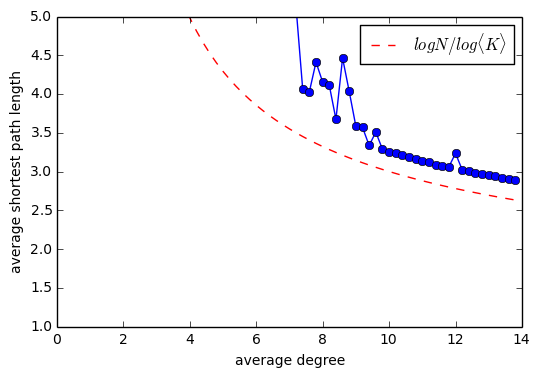

In [26]:
plt.plot(krange, Avg_spl, 'o-')
plt.plot(krange, [np.log(N)/np.log(k) for k in krange], 'r--', label=r'$logN/log\langle K\rangle$')
plt.xlabel('average degree')
plt.ylabel('average shortest path length')
plt.ylim(1,5)
plt.legend()

## 小世界网络相关统计
1. 阅读Nature的WS模型的文献
2. 用程序生成WS模型，并对其小世界特性进行计算

In [ ]:
N = 100 # 节点数
m = 4 # 起始连接的最近邻数
p = 0.1 # 断边重连概率

g = nx.watts_strogatz_graph(N, m, p)

#### 小世界特性

In [3]:
N = 1000
m = 4

g = nx.watts_strogatz_graph(N,m,0)
d0 = nx.average_shortest_path_length(g)
c0 = nx.average_clustering(g)

print d0
print c0

125.375375375
0.5


In [4]:
p = 1.0

prange = []
drange = []
crange = []
for i in xrange(20):
    prange.append(p)
    d = []
    c = []
    for _ in xrange(10):
        g = nx.watts_strogatz_graph(N,m,p)
        d.append(nx.average_shortest_path_length(g))
        c.append(nx.average_clustering(g))
    d = np.mean(d)
    c = np.mean(c)
    drange.append(d/d0)
    crange.append(c/c0)
    p *= 0.6

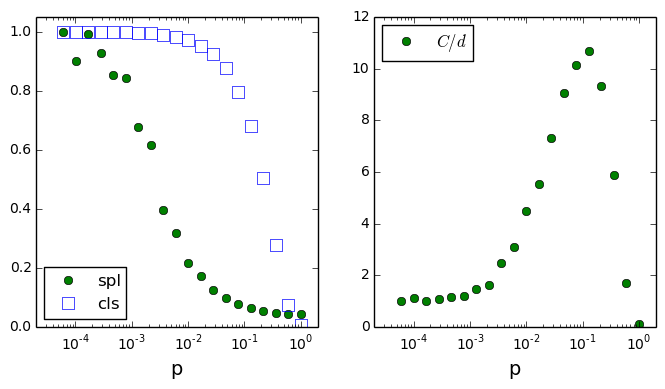

In [5]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(prange, drange, 'go', label='spl')
plt.plot(prange, crange, 'bs', ms=8,markeredgecolor='b',markerfacecolor='none',label='cls')
plt.xlim(2e-5,2)
plt.ylim(0,1.05)
plt.xscale('log')
plt.legend(loc='lower left',numpoints=1)
plt.xlabel('p', fontsize=14)

plt.subplot(1,2,2)
ratio = [crange[i]/drange[i] for i in xrange(len(crange))]
plt.plot(prange, ratio, 'go',label=r'$C/d$')
plt.xlim(2e-5,2)
#plt.ylim(0,1.05)
plt.xscale('log')
plt.legend(loc='upper left',numpoints=1)
plt.xlabel('p', fontsize=14)

#### 空手道俱乐部的小世界特性分析

In [4]:
## import network
G = nx.karate_club_graph()

## basic stats
N = G.number_of_nodes()
L = G.number_of_edges()

avg_dist = nx.average_shortest_path_length(G)
avg_clus = nx.average_clustering(G)

print 'avgerage SPL:',avg_dist
print 'avgerage C:',avg_clus

avgerage SPL: 2.40819964349
avgerage C: 0.570638478208



与其随机换边后结果的比较(随机网络是相同节点和边数量的随机网):

In [17]:
## stats of the random shuffled networks
avg_dist_r = []
avg_clus_r = []

#print N,2.0*L/N
for _ in xrange(100):
    g = nx.generators.random_graphs.gnm_random_graph(n=N,m=L,directed=False)
    avg_dist_r.append(spl_2(g))
    avg_clus_r.append(nx.average_clustering(g))
#    if nx.is_connected(g):
#        avg_dist_r.append(nx.average_shortest_path_length(g))
#        avg_clus_r.append(nx.average_clustering(g))
#    else:
#        continue

    
avg_dist_r = np.mean(avg_dist_r)
avg_clus_r = np.mean(avg_clus_r)


print 'avgerage SPL:',avg_dist_r
print 'avgerage C:',avg_clus_r



34 4.58823529412
avgerage SPL: 2.83795008913
avgerage C: 0.128854362957


集聚系数相比于随机化的情况大很多。

| | N| < k \>| L | L_random | C | C_random |
|:--:|:---:|:---:|:--:|:--:|:--:|:--:|
|karate| 34 | 4.5 | 2.4 | 2.84 | 0.57 | 0.13| 

## 无标度网络

无标度网络指 网络的度分布 服从幂律分布。

$$p(k) \propto k^{-\alpha}$$


本章练习与作业
1. 拟合一个实际网络的度分布是否是幂律的？
2. 阅读BA模型的文献;用程序生成一个BA模型，并且拟合度分布及幂律指数

### 以科学家合作网为例

原始数据以‘文章编号 作者编号’的形式给出连边数据，读入网络数据后，会得到一个二分网络(bipartite)。

**二分网络(bipartite): 存在两类节点，连边只存在于同类节点间。**

In [18]:
## 读取网络链接数据

edgelist = []
authors = []
papers = []
with open('./data/paperauthorId.txt', 'r') as fr:
    for line in fr:
        p,a = line.strip().split('\t')
        edgelist.append(('p'+p, 'a'+a))
        authors.append('a'+a)
        papers.append('p'+p)

B = nx.Graph()
B.add_edges_from(edgelist)


authors = list(set(authors))
print len(authors)
#B = nx.read_edgelist('paperauthorId',create_using=nx.Graph(), nodetype=int)

1992


In [19]:
print '节点数:',B.number_of_nodes()
print '边数:',B.number_of_edges()

节点数: 4004
边数: 5240


查看网络是否为二分网
```python
nx.is_bipartite(G)
```

关于二分网络的其它操作，可以参考[说明文档](https://networkx.readthedocs.io/en/stable/reference/algorithms.bipartite.html)

In [20]:
print nx.is_bipartite(B)

True


接下来查看作者合作网络的度分布。
首先需要将二分网映射为作者合作网。

```python
nx.algorithms.bipartite.projected_graph(B, nodes=authors)
```

In [21]:
## 将二分网映射为作者合作网

g = nx.algorithms.bipartite.projected_graph(B, nodes=authors)

#g= list(nx.connected_component_subgraphs(g))[0]
print '节点数:',g.number_of_nodes()
print '边数:',g.number_of_edges()


节点数: 1992
边数: 3485


[126, 404, 468, 331, 233, 124, 87, 47, 49, 24, 18, 11, 9, 7, 8, 13, 1, 4, 2, 2, 1, 2, 2, 4, 3, 2, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


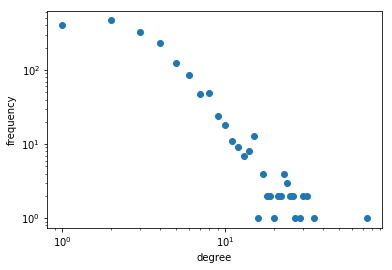

In [22]:
## degree of each nodes
deg_dist = nx.degree_histogram(g)
print deg_dist

author_deg = g.degree().values()
plt.loglog(range(0, len(deg_dist)), deg_dist, 'o')
plt.xlabel('degree')
plt.ylabel('frequency')


#### 非等间距分箱

-3.09583565953 9.88153928644


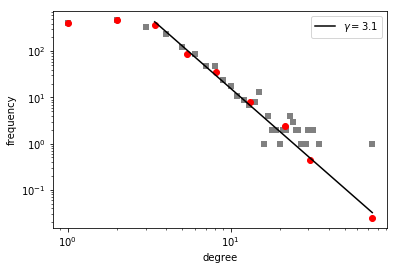

In [23]:
## 非等间距分箱

x = []
y = []

max_k = len(deg_dist)

k0 = 1
dk = 1.6
while k0<=len(deg_dist):
    k1 = k0*dk
    n=sum([deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    m = sum([k*deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    if n>0:
        x.append(1.0*m/n)
        y.append(n/max(1,(k1-k0)))
    k0 = k1

plt.loglog(x,y,'ro')

ln_x = np.log(x[2:])
ln_y = np.log(y[2:])
A = np.vstack([ln_x, np.ones(len(ln_x))]).T
m,c = np.linalg.lstsq(A,ln_y)[0]
print m,c
plt.plot(np.e**ln_x,np.e**(m*ln_x+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))

plt.loglog(range(0, len(deg_dist)), deg_dist, 's', markerfacecolor='gray', markeredgecolor='none', zorder=-10)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()

#### 累积分布

-2.03342141558 9.29226091006


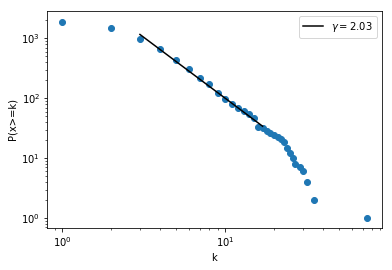

In [24]:
##累积分布
degree = nx.degree(g)
degree = degree.values()
distKeys = set(degree)
pdf = dict([(k,0) for k in distKeys])
for k in degree:
    pdf[k] += 1

cdf = dict([(k,0) for k in set(degree)])
for k in set(degree):
    cdf[k] = sum(np.array(degree)>=k)
    
plt.loglog(cdf.keys(), cdf.values(), 'o')
x = np.array([k for k in xrange(3,18)])
y = np.array([cdf[k] for k in xrange(3,18)])

x = np.log(x)
y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y)[0]
print m,c
plt.plot(np.e**x,np.e**(m*x+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))
plt.xlabel('k')
plt.ylabel('P(x>=k)')
plt.legend()

### BA无标度网络

两个机制
- 偏好依附
- 生长机制


networkx 中BA网络产生
```python
barabasi_albert_graph(N, m) #N 节点数，m 每次添边的数量
```

In [36]:
g = nx.barabasi_albert_graph(50000, 3)

deg_dist = nx.degree_histogram(g)
degree = nx.degree(g)
del g

#### 幂律指数拟合

##### 非等间距分箱

-2.82059977886 13.171173161


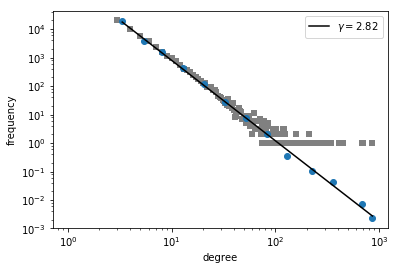

In [43]:
## 非等间距分箱

x = []
y = []

max_k = len(deg_dist)

k0 = 1
dk = 1.6
while k0<=len(deg_dist):
    k1 = k0*dk
    n=sum([deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    m = sum([k*deg_dist[k] for k in xrange(max_k) if k0<=k<k1])
    if n>0:
        x.append(1.0*m/n)
        y.append(n/max(1,(k1-k0)))
    k0 = k1

plt.loglog(x,y,'o')

ln_x = np.log(x[:])
ln_y = np.log(y[:])
A = np.vstack([ln_x, np.ones(len(ln_x))]).T
m,c = np.linalg.lstsq(A,ln_y)[0]
print m,c
plt.plot(np.e**ln_x,np.e**(m*ln_x+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))

plt.loglog(range(0, len(deg_dist)), deg_dist, 's', markerfacecolor='gray', markeredgecolor='none', zorder=-10)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()

##### 累积分布

-1.90506175947 12.9141190343


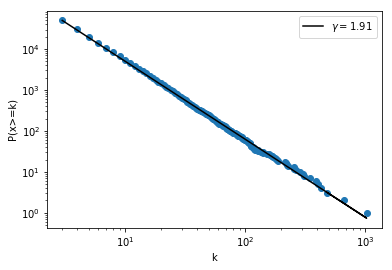

In [38]:
##累积分布
degree = degree.values()
distKeys = set(degree)
pdf = dict([(k,0) for k in distKeys])
for k in degree:
    pdf[k] += 1

cdf = dict([(k,0) for k in set(degree)])
for k in set(degree):
    cdf[k] = sum(np.array(degree)>=k)
    
plt.loglog(cdf.keys(), cdf.values(), 'o')
x = np.array([k for k in cdf])
y = np.array([cdf[k] for k in cdf])

x = np.log(x)
y = np.log(y)
A = np.vstack([x, np.ones(len(x))]).T
m,c = np.linalg.lstsq(A,y)[0]
print m,c
plt.plot(np.e**x,np.e**(m*x+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))
plt.xlabel('k')
plt.ylabel('P(x>=k)')
plt.legend()

- BA网络的幂指数与网络规模的关系？
- 每次加边的时候采用同时加边或者依次加边，有什么区别？

更加严谨的关于幂律分布的拟合可以参考[Power-law distributions in empirical data](http://tuvalu.santafe.edu/~aaronc/powerlaws/)

- A. Clauset, C.R. Shalizi, and M.E.J. Newman, "Power-law distributions in empirical data" SIAM Review 51, 661-703 (2009). (arXiv:0706.1062)


提供了相应的matlab、R、python([plfit](https://pypi.python.org/pypi/plfit))的幂律拟合的代码。


还可以使用[powerlaw](https://pypi.python.org/pypi/powerlaw)这个包，[paper](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777)和[documentation](http://pythonhosted.org/powerlaw/)

- Jeff Alstott, Ed Bullmore, Dietmar Plenz. (2014). powerlaw: a Python package for analysis of heavy-tailed distributions. PLoS ONE 9(1): e85777

使用'powerlaw'进行对BA网络进行幂律拟合

alpha: 3.05417943468
x-min: 24.0
D: 0.0189453708366


Calculating best minimal value for power law fit


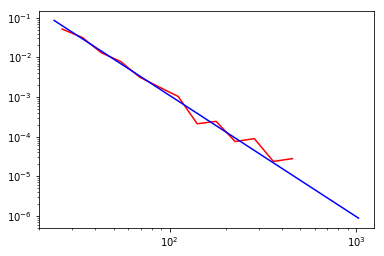

In [40]:
import powerlaw
fit = powerlaw.Fit(degree)
print 'alpha:',fit.power_law.alpha
print 'x-min:',fit.power_law.xmin
print 'D:',fit.power_law.D
fit.plot_pdf(color='r')
fit.power_law.plot_pdf(color='b',linestyle='-')
#powerlaw.plot_pdf(degree, linear_bins = True, color = 'r')

与其它分布的拟合比较
```python
R,p = fit.distribution_compare('power_law', 'lognormal_positive')
```
> R is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is p. 

In [72]:
R, p = fit.distribution_compare('power_law', 'lognormal_positive',normalized_ratio=True)
print R,p
R, p = fit.distribution_compare('power_law', 'exponential',normalized_ratio=True)
print R,p

4.25085336762 2.12957559924e-05
6.1123509519 9.81739860788e-10


/Users/bnu123/anaconda/lib/python2.7/site-packages/powerlaw.py:692: RuntimeWarning: divide by zero encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


在作者合作网络上的尝试

In [73]:
fit = powerlaw.Fit(author_deg)
print 'alpha:',fit.power_law.alpha
print 'x-min:',fit.power_law.xmin
print 'D:',fit.power_law.D
R, p = fit.distribution_compare('power_law', 'lognormal_positive',normalized_ratio=True)
print R,p
R, p = fit.distribution_compare('power_law', 'exponential',normalized_ratio=True)
print R,p

alpha: 6.11838915264
x-min: 23.0
D: 0.0631181485171
1.29790637989 0.194319507489
1.53509638389 0.124760154422


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


## 网络中的度度相关（匹配性）

衡量度度相关性的方法有:
    - degree correlation matrix (Maslov and Sneppen, Science 2001)
    - degree correlation function (Pastor Satorras and Vespignani, PRL 2001)
    - degree correlation coefficient (Newman, PRL 2002)
参考文献:
1. Maslov S, Sneppen K. Specificity and stability in topology of protein networks[J]. Science, 2002, 296(5569): 910-913.
2. Pastor-Satorras R, Vázquez A, Vespignani A. Dynamical and correlation properties of the Internet[J]. Physical review letters, 2001, 87(25): 258701.
2. Vázquez A, Pastor-Satorras R, Vespignani A. Large-scale topological and dynamical properties of the Internet[J]. Physical Review E, 2002, 65(6): 066130.
3. Newman M E J. Assortative mixing in networks[J]. Physical review letters, 2002, 89(20): 208701

作业:
1. 请选择一个实际网络，用三种方式来看网络的匹配性
2. 对上一张生成的BA网络，看网络的匹配性
3. 阅读Newman相关文献，并思考：Newman所提指标与计算度的pearson相关系数间的关系

### 实际网络示例

In [15]:
# 科学家合作网
g_coll = nx.read_edgelist('./data/N1461_Coauthorships', create_using=nx.Graph())

# neural network
g_neur = nx.read_edgelist('./data/N297_Celegans_neural', create_using=nx.Graph())

#### 度相关性矩阵 (degree correlation matrix)
$$E(k_0,k_1) = P(k_0,k_1)$$
$$C(k_0,k_1) = \frac{P(k_0,k_1)}{P_r(k_0,k_1)}$$


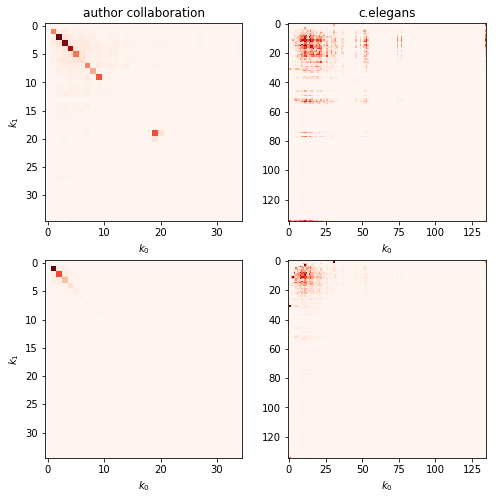

In [16]:
## Degree Correlation Matrix
def cal_correlation_matrix(g):
    degs = g.degree()
    max_k = max(degs.values())
    emat = np.zeros((max_k+1, max_k+1))
    cmat = np.zeros((max_k+1, max_k+1))
    L = g.number_of_edges()
    for i,j in g.edges():
        ki = degs[i]
        kj = degs[j]
        emat[ki,kj] += 1.0/2/L
        emat[kj,ki] += 1.0/2/L
        cmat[ki,kj] += 2.0*L/ki/kj
        cmat[kj,ki] += 2.0*L/ki/kj
    return emat,cmat




emat_coll,cmat_coll = cal_correlation_matrix(g_coll)
emat_neur,cmat_neur = cal_correlation_matrix(g_neur)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('author collaboration')
plt.imshow(emat_coll, cmap = 'Reds')
plt.xlabel(r'$k_0$')
plt.ylabel(r'$k_1$')

plt.subplot(2,2,3)
#plt.title('author collaboration')
plt.imshow(cmat_coll, cmap = 'Reds')
plt.xlabel(r'$k_0$')
plt.ylabel(r'$k_1$')


#plt.ylim(max_k, 0)

plt.subplot(2,2,2)
plt.title('c.elegans')
plt.imshow(emat_neur, cmap = 'Reds')
plt.xlabel(r'$k_0$')

plt.subplot(2,2,4)
plt.imshow(cmat_neur, cmap = 'Reds')
plt.xlabel(r'$k_0$')

展现出了完全不同的性质。

#### 度相关性函数(Degree Correlation Function)

$$k_{nn}(k) \equiv  \sum_{k'} k'P(k'|k)$$

Scaling Hypothesis
$$k_{nn}(k) \sim k^{\mu}$$

- $\mu<0$: Disassortative
- $\mu=0$: Neutral
- $\mu>0$: Assortative

$\mu$: 0.306116651004
$\mu$: -0.271482593959


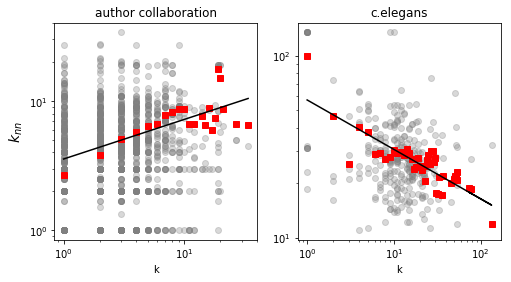

In [17]:
## Degree Correlation Function

def cal_correlation_function(g):
    annd = nx.average_neighbor_degree(g)
    deg = nx.degree(g)

    plt.loglog(deg.values(), annd.values(), 'o',c='gray', alpha=0.3)


    x = {}
    for i in deg:
        if deg[i] in x:
            x[deg[i]].append(annd[i])
        else:
            x[deg[i]] = [annd[i]]

    x = {i:np.mean(x[i]) for i in x}
    plt.loglog(x.keys(), x.values(), 'rs')
    # calculate the powerlaw index
    xk = np.log(np.array(x.keys()))
    yann = np.log(np.array(x.values()))
    A = np.vstack([xk, np.ones(len(xk))]).T
    m,c = np.linalg.lstsq(A,yann)[0]
    print r'$\mu$:',m
    plt.plot(np.e**xk,np.e**(m*xk+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('author collaboration')
cal_correlation_function(g_coll)
plt.xlabel('k')
plt.ylabel(r'$k_{nn}$',fontsize=14)

plt.subplot(1,2,2)
plt.title('c.elegans')
cal_correlation_function(g_neur)
plt.xlabel('k')

#### 匹配性系数 (degree correlation coefficient)

degree-degree correlation
$$\langle jk \rangle - \langle j \rangle \langle k \rangle=\sum_{jk}jk e_{jk} - \sum_j jq_j \sum_k kq_k=\sum_{jk}jk(e_{jk}-q_jq_k)$$

为了使得不同情况下可比，除以相关性最大值，即完美匹配的情况:$e_{jk}=q_k\delta_{jk}$，恰好为$q_k$的方差$\sigma^2= \sum_k k^2q^2_k -[\sum_k kq_k]^2$。

最终得到
$$r = \sum_{jk}\frac{jk(e_{jk} - q_jq_k)}{\sigma^2}$$

- $r<0$: Disassortative
- $r=0$: Neutral
- $r>0$: Assortative


在networkx中可以用
```python
nx.assortativity.degree_assortativity_coefficient(g)
```
实现。

In [4]:
## newman's assortativity coefficient
print nx.assortativity.degree_assortativity_coefficient(g_coll)
print nx.degree_pearson_correlation_coefficient(g_coll)

print nx.assortativity.degree_assortativity_coefficient(g_neur)

0.461622466753
0.461622466753
-0.163199210316


### BA网络匹配性分析

In [20]:
## BA网络

g_ba = nx.barabasi_albert_graph(50000, 2)

$\mu$: -0.0759376020298
r: -0.0226036322695


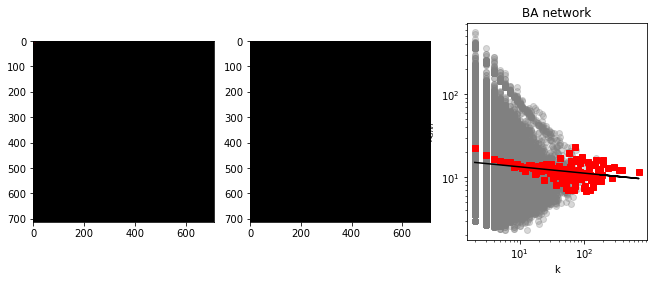

In [21]:
## Degree Correlation Matrix
emat_ba,cmat_ba = cal_correlation_matrix(g_ba)

plt.figure(figsize=(11,4))
plt.subplot(1,3,1)
plt.imshow(emat_ba, cmap = 'afmhot')

plt.subplot(1,3,2)
plt.imshow(cmat_ba, cmap = 'afmhot')

## Degree Correlation Function
plt.subplot(1,3,3)
plt.title('BA network')
cal_correlation_function(g_ba)
plt.xlabel('k')
plt.ylabel(r'$k_{ann}$')


## newman's assortativity coefficient
print 'r:',nx.assortativity.degree_assortativity_coefficient(g_ba)

说明BA网络基本没有匹配性(neutral)。

采用Pearson相关性的方式，可以看系数的显著性。

## 网络社团划分


### GN benchmark

GN模型是常用的含有社团结构的网络模型。给定网络的节点数N，社团数C，社团内的平均连接度zin，社团间的平均连接度zout。

In [3]:
## GN benchmark
import random

N = 126  # 网络规模
C = 3    # 社团数量
zin = 13 #社团内的连边数
zout = 3 #社团间的连边数


n = N/C # 每个社团的节点数

nodes = []
nall = []
for a in ['a','b','c']:
    xx = []
    for i in xrange(n):
        xx.append(a+str(i))
    nodes += xx
    nall.append(xx)

pin = 1.0*zin/(n-1)/2
pout = 1.0*zout/(3*n-1)/2

g = nx.Graph()

for nc in nall:
    for i in nc:
        for j in nc:
            if i==j:
                continue
            p = random.random()
            if p<pin:
                g.add_edge(i,j)
        for j in set(nodes)-set(nc):
            p = random.random()
            if p<pout:
                g.add_edge(i,j)

In [4]:
with open('./data/GN_benchmark.edgelist','w') as f:
    print>>f,'source,target,type,weight'
    for i,j in g.edges():
        print>>f,'%s,%s,undirected,1'%(i,j)

### 利用 laplacian矩阵进行社团划分

1. 计算laplacian矩阵
2. 计算L矩阵的特征值和特征向量($0=\lambda_0 < \lambda_1 < \lambda_2 \dots$)
3. 利用前几大特征值对应的特征向量进行聚类

In [14]:
lap_g = nx.laplacian_matrix(g) # laplacian matrix of g

In [12]:
eigval,eigvec = np.linalg.eigh(lap_g.todense())

之前生成的GN网络有3个社团，取第1和第2特征向量

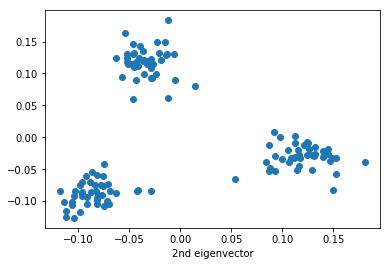

In [15]:
plt.plot(eigvec[:,1],eigvec[:,2],'o')
plt.xlabel('1st eigenvector')
plt.xlabel('2nd eigenvector')

### 利用模块度优化算法进行社团划分

In [7]:
import community

In [9]:
##first compute the best partition
partition = community.best_partition(g)

In [10]:
partition

{'a0': 2,
 'a1': 2,
 'a10': 2,
 'a11': 2,
 'a12': 2,
 'a13': 2,
 'a14': 2,
 'a15': 2,
 'a16': 2,
 'a17': 2,
 'a18': 2,
 'a19': 2,
 'a2': 2,
 'a20': 2,
 'a21': 2,
 'a22': 2,
 'a23': 2,
 'a24': 2,
 'a25': 2,
 'a26': 2,
 'a27': 2,
 'a28': 2,
 'a29': 2,
 'a3': 2,
 'a30': 2,
 'a31': 2,
 'a32': 2,
 'a33': 2,
 'a34': 2,
 'a35': 2,
 'a36': 2,
 'a37': 2,
 'a38': 2,
 'a39': 2,
 'a4': 2,
 'a40': 2,
 'a41': 2,
 'a5': 2,
 'a6': 2,
 'a7': 2,
 'a8': 2,
 'a9': 2,
 'b0': 0,
 'b1': 0,
 'b10': 0,
 'b11': 0,
 'b12': 0,
 'b13': 0,
 'b14': 0,
 'b15': 0,
 'b16': 0,
 'b17': 0,
 'b18': 0,
 'b19': 0,
 'b2': 0,
 'b20': 0,
 'b21': 0,
 'b22': 0,
 'b23': 0,
 'b24': 0,
 'b25': 0,
 'b26': 0,
 'b27': 0,
 'b28': 0,
 'b29': 0,
 'b3': 0,
 'b30': 0,
 'b31': 0,
 'b32': 0,
 'b33': 0,
 'b34': 0,
 'b35': 0,
 'b36': 0,
 'b37': 0,
 'b38': 0,
 'b39': 0,
 'b4': 0,
 'b40': 0,
 'b41': 0,
 'b5': 0,
 'b6': 0,
 'b7': 0,
 'b8': 0,
 'b9': 0,
 'c0': 1,
 'c1': 1,
 'c10': 1,
 'c11': 1,
 'c12': 1,
 'c13': 1,
 'c14': 1,
 'c15': 1,
 'c16': 1,

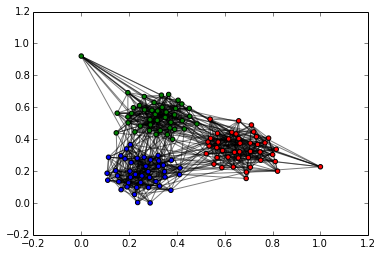

In [13]:
##drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(g)
count = 0.

colors=['r','g','b']
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20,
                                node_color = colors[com])


nx.draw_networkx_edges(g,pos, alpha=0.5)
plt.show()

模块度

In [14]:
## modularity
community.modularity(partition,g)

0.5257097971692732

## 网络动力学

### 疾病传播

#### SIR
S状态的节点以概率$\beta$被处于I状态的邻居感染，I状态的节点以概率$\gamma$恢复为R状态节点。

In [21]:
## SIR 模型

def suspect_infect_recovery(G, sources, beta, gamma, T='inf'):
    state = {i:'S' for i in G}
    for s in sources:
        state[s] = 'I'
    if T=='inf':
        dt = 0
    else:
        dt = 1
    iterator = 0
    flag = False
    while iterator < T:
        iterator += dt
        if flag:
            return state
        flag = True
        state_temp = state.copy()
        for i in G:
            if state[i] == 'S':
                nbs = sum([1 for j in G.neighbors(i) if state[j]=="I"])
                if nbs == 0:
                    continue
                if random.random() < (1 - (1-beta)**nbs):
                    state_temp[i] = 'I'
            elif state[i] == 'I':
                flag = False
                if random.random() < gamma:
                    state_temp[i] = 'R'
        state = state_temp.copy()
    return state

在空手道俱乐部上模拟SIR过程，以1号节点为起始节点

In [22]:
beta = 0.3
gamma = 1
g = nx.karate_club_graph()

state = suspect_infect_recovery(g,[1],beta,gamma)
print '各个节点的状态: ',state
print '总感染数: ',sum([1 for i in state if state[i]!='S'])

各个节点的状态:  {0: 'R', 1: 'R', 2: 'S', 3: 'S', 4: 'R', 5: 'S', 6: 'R', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'R', 13: 'R', 14: 'S', 15: 'S', 16: 'S', 17: 'R', 18: 'S', 19: 'S', 20: 'S', 21: 'S', 22: 'S', 23: 'S', 24: 'S', 25: 'S', 26: 'S', 27: 'S', 28: 'R', 29: 'S', 30: 'S', 31: 'R', 32: 'R', 33: 'S'}
总感染数:  10


## 节点重要性